In [1]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


/home/davinci/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/davinci/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [9]:
word_indexes = reuters.get_word_index()

reverse_index_word = dict([(value, key) for (key, value) in word_indexes.items()])

decoded_news = ' '.join([reverse_index_word.get(i-3, '?') for i in train_data[0]])

decoded_news

557056/550378 [==============================] - 1s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i,word_num in enumerate(sequences):
        result[i,word_num]=1.
    return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

"""
def one_hot_vectorizer(labels,length=46):
    result = np.zeros((len(labels) , length))
    for i, num in enumerate(labels):
        result[i, num]=1.
    return result

y_train = one_hot_vectorizer(train_labels)
y_test = one_hot_vectorizeer(test_labels)
"""

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [15]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
histoty = model.fit(partial_x_train, partial_y_train,
                   epochs=50, batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/50
16/16 [==============================] - 2s 48ms/step - loss: 3.2907 - accuracy: 0.3982 - val_loss: 1.8710 - val_accuracy: 0.6400
Epoch 2/50
16/16 [==============================] - 0s 22ms/step - loss: 1.6037 - accuracy: 0.6898 - val_loss: 1.3616 - val_accuracy: 0.6980
Epoch 3/50
16/16 [==============================] - 0s 21ms/step - loss: 1.1264 - accuracy: 0.7589 - val_loss: 1.1452 - val_accuracy: 0.7500
Epoch 4/50
16/16 [==============================] - 0s 22ms/step - loss: 0.8580 - accuracy: 0.8206 - val_loss: 1.0385 - val_accuracy: 0.7840
Epoch 5/50
16/16 [==============================] - 0s 22ms/step - loss: 0.6976 - accuracy: 0.8540 - val_loss: 0.9665 - val_accuracy: 0.8000
Epoch 6/50
16/16 [==============================] - 0s 22ms/step - loss: 0.5573 - accuracy: 0.8845 - val_loss: 0.9543 - val_accuracy: 0.8030
Epoch 7/50
16/16 [==============================] - 0s 21ms/step - loss: 0.4500 - accuracy: 0.9098 - val_loss: 0.9242 - val_accuracy: 0.8160
Epoch 8/50
16

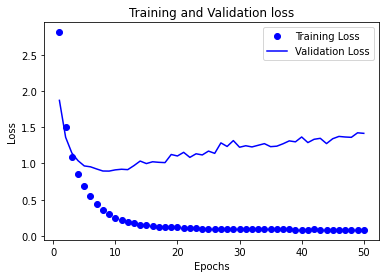

In [21]:
# loss plot

from matplotlib import pyplot as plt

loss_hist = histoty.history['loss']
val_loss = histoty.history['val_loss']

epochs = range(1, len(loss_hist)+1)
plt.plot(epochs, loss_hist, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

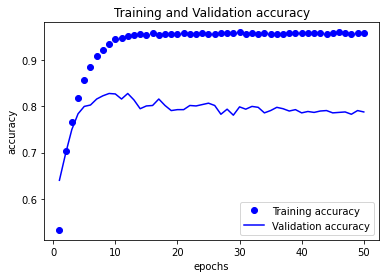

In [22]:
# accuracy plot

accuracy_hist = histoty.history['accuracy']
val_accuracy = histoty.history['val_accuracy']

plt.clf()
plt.plot(epochs, accuracy_hist, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.show()

In [23]:
# in the above figure we can see in epoch=9 validation accurcy achive maximum so:

from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

histoty = model.fit(partial_x_train, partial_y_train,
                   epochs=9, batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 33ms/step - loss: 3.0694 - accuracy: 0.3708 - val_loss: 1.7269 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 0s 23ms/step - loss: 1.5010 - accuracy: 0.6802 - val_loss: 1.3165 - val_accuracy: 0.7290
Epoch 3/9
16/16 [==============================] - 0s 22ms/step - loss: 1.1139 - accuracy: 0.7664 - val_loss: 1.1469 - val_accuracy: 0.7510
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8568 - accuracy: 0.8217 - val_loss: 1.0354 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 0s 22ms/step - loss: 0.6783 - accuracy: 0.8563 - val_loss: 0.9694 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5268 - accuracy: 0.8915 - val_loss: 0.9342 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 23ms/step - loss: 0.4338 - accuracy: 0.9114 - val_loss: 0.9068 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [24]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9873 - accuracy: 0.7867


In [26]:
prediction = model.predict(x_test)